In [27]:
import os
os.chdir('..\\') # in ./tests folder - so changing to parent folder for imports
from consts import FOLDER2FLOW_RESULTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class df_extra:    
    def __init__(self, df):
        self.df = df
        self.num_rows = df.shape[0]
        self.data_dict = {}

    def add_data_to_df(self, col_name, data):
        self.data_dict[col_name] = [data]*self.num_rows
        self.df[col_name] = data

def print_means(df, evals):
    mus = ["0.4", "0.5", "0.6"]
    for _eval in evals:
            for mu in mus:
                for algo in df.algo.unique():
                    algo_rows = df.loc[df["algo"]==algo].loc[df["mu"]==mu]
                    avg = algo_rows[_eval].mean()
                    print(f"avg for: {algo}, {mu}, {_eval}:\t {avg}")
    return

def create_united_df(date_folder, timelimit=600): # This is a df of all networks in folder
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, date_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)
        _df_extra.add_data_to_df("mu", network.split("_")[1])

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    
    # replace names to shorter names for readabilty
    df["algo"].replace(f"NLP-100-TL-{timelimit}", "NLP100", inplace=True)
    df["algo"].replace(f"NLP-150-TL-{timelimit}", "NLP150", inplace=True)
    df["algo"].replace(f"NLP-200-TL-{timelimit}", "NLP200", inplace=True)
    
    df["algo"].replace(f"LLP-100", "LLP100", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 150", "LLP150", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 200", "LLP200", inplace=True)
    
    return df

def run_visu(input_folder):
    df = create_united_df(input_folder)
    return df

def run_visu_benchmark(input_folder):
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, input_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    return df

def create_bar_graphs_benchmark(df, evals, title="Graph"):
    for eval in evals:
        name = f"{title}-{eval}"
        ax = sns.barplot(x="network", y=eval, hue="algo", data=df).set(title=name)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

def create_bar_graphs(df, evals, title="Graph"):
    for eval in evals:
        name = f"{title}-{eval}"
        sns_plot = sns.barplot(x="mu", y=eval, hue="algo", data=df).set(title=name)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()


def print_times(df):
    # mus = ["0.4", "0.5", "0.6"]
    # for mu in mus:
        for algo in df.algo.unique():
            algo_rows = df.loc[df["algo"]==algo]
            avg = algo_rows["time-sec"].mean()
            print(f"avg time for: {algo} :\t {avg}")
        return

evals=["modularity - algo", "jaccard","graph_accuracy","graph_conductance"]



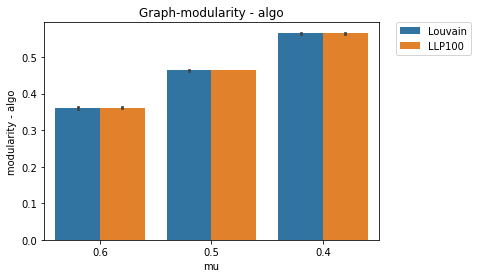

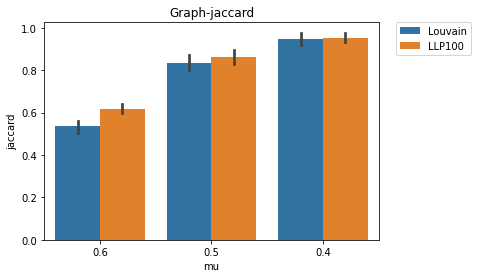

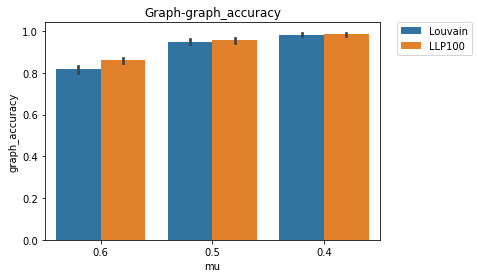

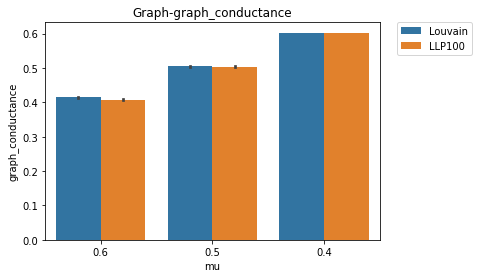

avg for: Louvain, 0.4, modularity - algo:	 0.5653008828804642
avg for: LLP100, 0.4, modularity - algo:	 0.5653975313742274
avg for: Louvain, 0.5, modularity - algo:	 0.46408637055689467
avg for: LLP100, 0.5, modularity - algo:	 0.4643112187614493
avg for: Louvain, 0.6, modularity - algo:	 0.36054387807393284
avg for: LLP100, 0.6, modularity - algo:	 0.3610680033885779
avg for: Louvain, 0.4, jaccard:	 0.9482051701311353
avg for: LLP100, 0.4, jaccard:	 0.9531472571999415
avg for: Louvain, 0.5, jaccard:	 0.8358181574459953
avg for: LLP100, 0.5, jaccard:	 0.8637200343880563
avg for: Louvain, 0.6, jaccard:	 0.5361730312634528
avg for: LLP100, 0.6, jaccard:	 0.6178781328456344
avg for: Louvain, 0.4, graph_accuracy:	 0.9836205382599397
avg for: LLP100, 0.4, graph_accuracy:	 0.9852761651720016
avg for: Louvain, 0.5, graph_accuracy:	 0.949400097739181
avg for: LLP100, 0.5, graph_accuracy:	 0.9569833002002536
avg for: Louvain, 0.6, graph_accuracy:	 0.818403128999123
avg for: LLP100, 0.6, graph_a

,algo,modularity - real,modularity - algo,jaccard,graph_conductance,graph_sensitivity,graph_accuracy,num communities - real,num communities - algo,num_coms_divided,num_coms_skipped,number_of_mega_nodes,iterations,split_method,lp,TimeLimit,time-sec,network,mu
0,Louvain,0.363148,0.363398,0.589774,0.416752,0.988,0.844007,30,20,None,None,NaN,NaN,newman,NaN,600,0.140860,1000_0.6_9,0.6
1,LLP100,0.363148,0.362341,0.590466,0.411996,0.963,0.841884,30,21,None,None,81.0,1.0,newman,100.0,600,1171.357225,1000_0.6_9,0.6
2,Louvain,0.362887,0.355981,0.576825,0.409140,0.951,0.845667,28,20,None,None,NaN,NaN,newman,100.0,600,0.238628,1000_0.6_8,0.6
3,LLP100,0.362887,0.358497,0.632138,0.404785,0.952,0.869418,28,22,None,None,68.0,1.0,newman,100.0,600,1361.609801,1000_0.6_8,0.6
4,Louvain,0.363978,0.361198,0.554708,0.413615,0.980,0.837078,30,20,None,None,NaN,NaN,newman,100.0,600,0.213540,1000_0.6_7,0.6
5,LLP100,0.363978,0.362790,0.673138,0.407057,0.973,0.889409,30,24,None,None,77.0,1.0,newman,100.0,600,1363.758176,1000_0.6_7,0.6
6,Louvain,0.364689,0.357754,0.518623,0.407514,0.959,0.833832,30,22,None,None,NaN,NaN,newman,100.0,600,0.223561,1000_0.6_6,0.6
7,LLP100,0.364689,0.360719,0.630959,0.407359,0.976,0.877533,30,23,None,None,77.0,1.0,newman,100.0,600,389.987104,1000_0.6_6,0.6
8,Louvain,0.365454,0.361158,0.512545,0.413476,0.954,0.790487,32,20,None,None,NaN,NaN,newman,100.0,600,0.256356,1000_0.6_5,0.6
9,LLP100,0.365454,0.363955,0.592480,0.412905,0.980,0.838248,32,21,None,None,80.0,1.0,newman,100.0,600,389.486614,1000_0.6_5,0.6


In [28]:
input_folder = "18-06-2022--14-57-58-louvain-with-newman-split-1000"
df = run_visu(input_folder)
create_bar_graphs(df,evals)
print_means(df, evals)
print_times(df)
display(df)

